## Impact of Truncation of Shocks

These calculations test the impact of truncating the innovations to the Bansal-Yaron process on the spectral radius results.

In [51]:
include("src/by_interpolation.jl")

compute_mm_coef_interp

In [10]:
"""
Compute the spectral radius by iteration.

"""
function compute_spec_rad_mc!(ez::EpsteinZin, 
                                 by::BYconsumption,
                                 z_grid,
                                 σ_grid;
                                 n=100,
                                 truncate=t,
                                 tol=1e-6, 
                                 max_iter=5000) 
    g_in = ones(gs_z, gs_σ)
    g_out = similar(g_in)

    error = tol + 1
    r = 1
    i = 1
    
    srand(1234)
    η_vec = randn(n)
    ω_vec = randn(n)
    for vec in (η_vec, ω_vec)
        for (i, z) in enumerate(vec)
            if z > truncate
                vec[i] = truncate
            elseif z < -truncate
                vec[i] = - truncate
            end
        end
    end

    while error > tol && i < max_iter
        s = K_interp!(ez, by, g_in, g_out, z_grid, σ_grid, η_vec, ω_vec)
        new_r = s^(1/i)
        error = abs(new_r - r)
        copy!(g_in, g_out)
        i += 1
        r = new_r
    end

    return r
end


compute_spec_rad_mc!

In [11]:
ez = EpsteinZinBY()
by = BYconsumption()

BYconsumption{Float64}(0.0015, 0.979, 0.044, 0.987, 7.9092e-7, 2.3e-6)

In [12]:
gs_z, gs_σ = 12, 12

z_min, z_max, σ_min, σ_max, c_max = compute_bounds(by)
σ_grid = linspace(σ_min, σ_max, gs_z)
z_grid = linspace(z_min, z_max, gs_σ)

-0.0033004886620103245:0.0006016806175855395:0.00331799813143061

In [19]:
t_vec = linspace(0.5, 2.5, 20)

0.5:0.10526315789473684:2.5

In [20]:
rs = similar(t_vec)
for (i, t) in enumerate(t_vec)
    rs[i] = compute_spec_rad_mc!(ez, by, z_grid, σ_grid, truncate=t)
end

In [49]:
using PyPlot
plt = PyPlot

PyPlot

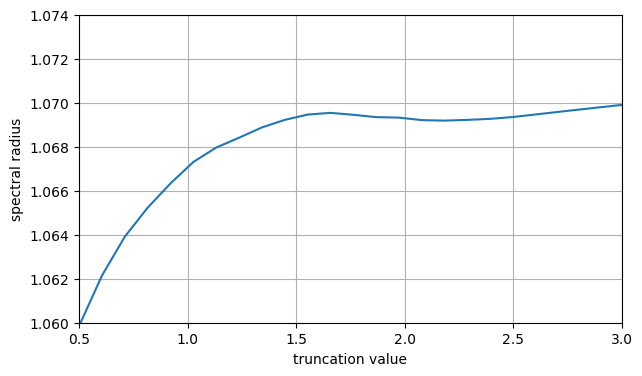

In [50]:
fig, ax = plt.subplots(figsize=(7, 4))
ax[:plot](t_vec, rs)
ax[:grid]()
ax[:set](ylim=(1.06, 1.074), xlim=(0.5, 3.0), xlabel="truncation value", ylabel="spectral radius")
ax[:legend]()
plt.savefig("errors.pdf")
plt.show()

In [41]:
quantile(randn(10000), 0.999)

2.9870828376083063